In [1]:
#AUTOENCODER 
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded  = layers.Dense(encoding_dim, activation = 'relu')(input_img)
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:


(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train= x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data =(x_test, x_test))


(60000, 784)
(10000, 784)
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5014 - val_loss: 0.3380
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3288 - val_loss: 0.3173
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3126 - val_loss: 0.3072
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3035 - val_loss: 0.3003
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2962 - val_loss: 0.2955
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2932 - val_loss: 0.2923
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2897 - val_loss: 0.2902
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2876 - val_loss: 0.2888
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2855 - val_loss: 0.2883
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2857 - val_loss: 0.2878
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2843 - val_loss: 0.2869
Epoch 12/20
235

In [4]:

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


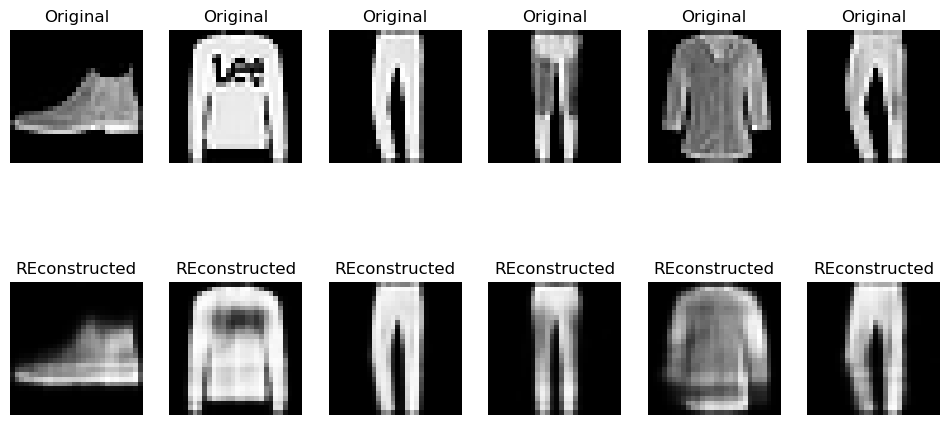

In [5]:
n = 6
plt.figure(figsize=(12, 6))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title("Original")
  plt.axis('off')

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.title("REconstructed")
  plt.axis('off')
plt.show()